In [1]:
#Import the sqlite3 module and other libraries

import sqlite3
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_testing',
 '_typing',
 '_version',
 'annotations',
 'api',
 'array',
 'arrays',
 'bdate_range',
 'compat',
 'concat',
 'c

In [3]:
#Connect to an SQlite Database
conn = sqlite3.connect('C:/Users/Adekoyejo.dada/Desktop/3signet/3signet/Week_9/Pharm_Data.db')
cursor = conn.cursor()

In [4]:
# Query the data from a table
query = "SELECT * FROM Pharm_Data;"
df = pd.read_sql_query(query,conn)

print(df.head())

            Distributor                          CustomerName     City  \
0  Gottlieb-Cruickshank                Zieme, Doyle and Kunze   Lublin   
1  Gottlieb-Cruickshank                             Feest PLC  ?wiecie   
2  Gottlieb-Cruickshank  Medhurst-Beer Pharmaceutical Limited   Rybnik   
3  Gottlieb-Cruickshank                 Barton Ltd Pharma Plc  Czelad?   
4  Gottlieb-Cruickshank                  Keeling LLC Pharmacy  Olsztyn   

  Country  Latitude  Longitude   Channel  Sub-channel             ProductName  \
0  Poland   51.2333    22.5667  Hospital      Private              Topipizole   
1  Poland   53.4167    18.4333  Pharmacy       Retail            Choriotrisin   
2  Poland   50.0833    18.5000  Pharmacy  Institution               Acantaine   
3  Poland   50.3333    19.0833  Hospital      Private    Lioletine Refliruvax   
4  Poland   53.7800    20.4942  Pharmacy       Retail  Oxymotroban Fexoformin   

       ProductClass  Quantity  Price   Sales    Month  Year NameofSa

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Distributor     254082 non-null  object 
 1   CustomerName    254082 non-null  object 
 2   City            254082 non-null  object 
 3   Country         254082 non-null  object 
 4   Latitude        254082 non-null  float64
 5   Longitude       254082 non-null  float64
 6   Channel         254082 non-null  object 
 7   Sub-channel     254082 non-null  object 
 8   ProductName     254082 non-null  object 
 9   ProductClass    254082 non-null  object 
 10  Quantity        254082 non-null  float64
 11  Price           254082 non-null  int64  
 12  Sales           254082 non-null  float64
 13  Month           254082 non-null  object 
 14  Year            254082 non-null  int64  
 15  NameofSalesRep  254082 non-null  object 
 16  Manager         254082 non-null  object 
 17  SalesTeam 

# Perform Data Validation to ensure consistency and Data Quality

In [6]:
#Data preprocessing
#Check for missing values

missing_data = df.isnull().sum()
print(missing_data)

Distributor       0
CustomerName      0
City              0
Country           0
Latitude          0
Longitude         0
Channel           0
Sub-channel       0
ProductName       0
ProductClass      0
Quantity          0
Price             0
Sales             0
Month             0
Year              0
NameofSalesRep    0
Manager           0
SalesTeam         0
dtype: int64


In [7]:
#Removing Duplicates
#Check for duplicates

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

           Distributor                            CustomerName  \
24328   Prohaska-Kuhic  Steuber, Skiles and Kilback Pharma Plc   
57178           Erdman          Fritsch LLC Pharmaceutical Ltd   
140251     Gerlach LLC            Crona PLC Pharmaceutical Ltd   
177689     Gerlach LLC    Steuber, Skiles and Kilback Pharmacy   

                            City  Country  Latitude  Longitude   Channel  \
24328                  Sosnowiec   Poland   50.3000    19.1667  Pharmacy   
57178                    M�lheim  Germany   51.4283     6.8789  Hospital   
140251  Schlo� Holte-Stukenbrock  Germany   51.8833     8.6167  Pharmacy   
177689                   Datteln  Germany   51.6539     7.3417  Pharmacy   

        Sub-channel           ProductName ProductClass  Quantity  Price  \
24328        Retail            Dasagestin   Analgesics      10.0    386   
57178    Government            Amphesirox  Antiseptics      30.0     25   
140251  Institution              Thionide   Analgesics      10.

In [8]:
#Remove duplicates
df_no_duplicates = df.drop_duplicates(keep='last', inplace =True)

In [9]:
print (df)

                 Distributor                                CustomerName  \
0       Gottlieb-Cruickshank                      Zieme, Doyle and Kunze   
1       Gottlieb-Cruickshank                                   Feest PLC   
2       Gottlieb-Cruickshank        Medhurst-Beer Pharmaceutical Limited   
3       Gottlieb-Cruickshank                       Barton Ltd Pharma Plc   
4       Gottlieb-Cruickshank                        Keeling LLC Pharmacy   
...                      ...                                         ...   
254077    Bashirian-Kassulke  Koch, Borer and Hagenes Pharmaceutical Ltd   
254078    Bashirian-Kassulke                 Hane Ltd Pharmaceutical Ltd   
254079    Bashirian-Kassulke                      Harris-Conroy Pharmacy   
254080    Bashirian-Kassulke                      Balistreri Group Pharm   
254081    Bashirian-Kassulke               Heathcote, Kovacek and Parker   

                 City  Country  Latitude  Longitude   Channel  Sub-channel  \
0        

In [10]:
#Data Validation
#Check datatypes

#Convert datatypes
df['Quantity'] = pd.to_numeric(df['Quantity'], errors = 'coerce')
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors = 'coerce')
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

In [11]:
print(df.describe(include='all'))

        Distributor                 CustomerName       City  Country  \
count        254078                       254078     254078   254078   
unique           29                          751        749        2   
top     Gerlach LLC  Spinka, Schowalter and Conn  Friedberg  Germany   
freq         111362                          440        796   213595   
mean            NaN                          NaN        NaN      NaN   
min             NaN                          NaN        NaN      NaN   
25%             NaN                          NaN        NaN      NaN   
50%             NaN                          NaN        NaN      NaN   
75%             NaN                          NaN        NaN      NaN   
max             NaN                          NaN        NaN      NaN   
std             NaN                          NaN        NaN      NaN   

             Latitude      Longitude   Channel Sub-channel ProductName  \
count   254078.000000  254078.000000    254078      254078   

## Analyze Sales data by Year, Product and Region to identify trends and pattterns.

In [12]:
sales_data = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/3signet/Week_7/Pharm_Data.csv', encoding='latin-1')

In [13]:
print (sales_data.head())

              Distributor                         Customer Name     City  \
0  Gottlieb-Cruickshank                 Zieme, Doyle and Kunze    Lublin   
1  Gottlieb-Cruickshank                              Feest PLC   ?wiecie   
2  Gottlieb-Cruickshank    Medhurst-Beer Pharmaceutical Limited   Rybnik   
3  Gottlieb-Cruickshank                   Barton Ltd Pharma Plc  Czelad?   
4  Gottlieb-Cruickshank                    Keeling LLC Pharmacy  Olsztyn   

  Country  Latitude  Longitude   Channel  Sub-channel            Product Name  \
0  Poland   51.2333    22.5667  Hospital      Private              Topipizole   
1  Poland   53.4167    18.4333  Pharmacy       Retail            Choriotrisin   
2  Poland   50.0833    18.5000  Pharmacy  Institution               Acantaine   
3  Poland   50.3333    19.0833  Hospital      Private    Lioletine Refliruvax   
4  Poland   53.7800    20.4942  Pharmacy       Retail  Oxymotroban Fexoformin   

      Product Class  Quantity  Price   Sales    Month  Y

In [14]:
#Data Validation
#Check datatypes

#Convert datatypes
sales_data['Quantity'] = pd.to_numeric(sales_data['Quantity'], errors = 'coerce')
sales_data['Price'] = pd.to_numeric(sales_data['Price'], errors = 'coerce')
sales_data['Sales'] = pd.to_numeric(sales_data['Sales'], errors = 'coerce')
sales_data['Year'] = pd.to_datetime(sales_data['Year'], errors='coerce')

In [15]:
#Rename some columns using the CamelCase format
sales_data.rename(columns={
    "Customer Name": "CustomerName", 
    "Product Name": "ProductName", 
    "Product Class": "ProductClass", 
    "Name of Sales Rep":"NamesofSalesRep",
    "Sales Team": "SalesTeam"
}, inplace = True)

In [16]:
#Group and aggregate data
#Total sales by year, product and region
grouped_data = sales_data.groupby(['Year', 'ProductClass', 'Country'])['Sales'].sum().reset_index()


In [17]:
#Analyze Trends
#Pivot data for better visualisations
pivot_year_region = grouped_data.pivot_table(index='Year', columns='Country', values='Sales', aggfunc='sum')
pivot_year_product = grouped_data.pivot_table(index='Year', columns='ProductClass', values='Sales', aggfunc='sum')


<Figure size 1000x600 with 0 Axes>

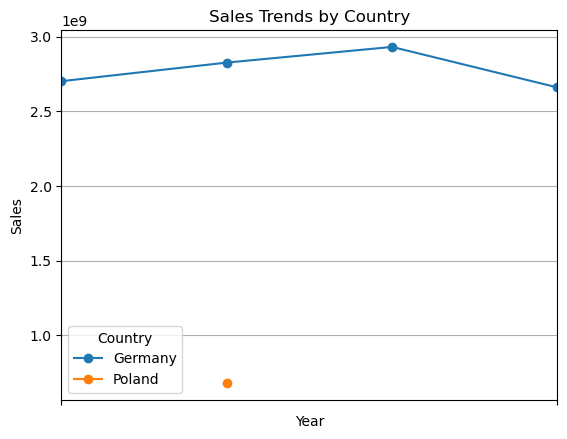

([<matplotlib.axis.XTick at 0x1eb51547910>,
  ...],
 [Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11, 0, '2.335648'),
  Text(2.335648148148148e-11

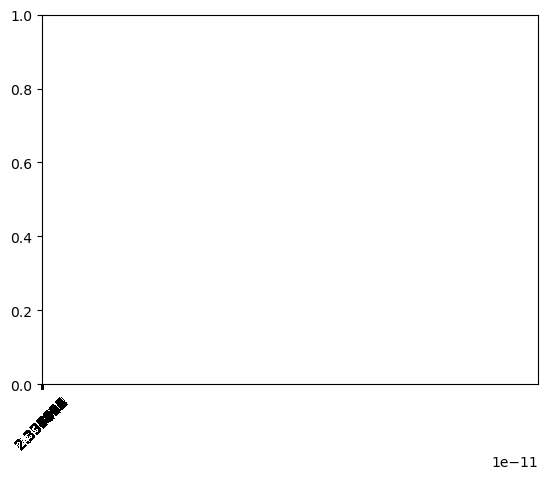

In [18]:
#Visualise Trends
#Sales trends by Country over the years 2017, 2018, 2019 amd 2020
plt.figure(figsize=(10, 6))
pivot_year_region.plot(kind='line', marker = 'o')
plt.title('Sales Trends by Country')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Country')
plt.grid(True)
plt.show()
plt.xticks(df['Year'], rotation =45)

<Figure size 1000x600 with 0 Axes>

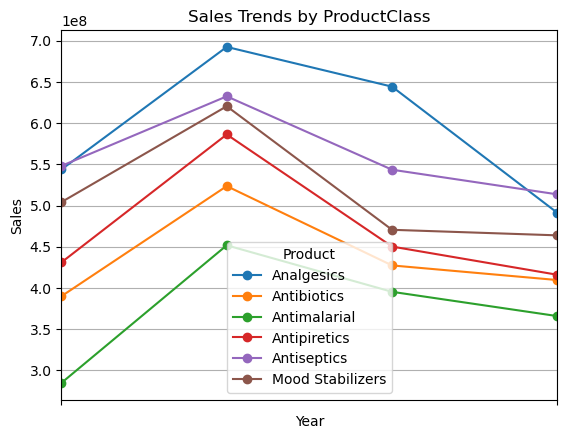

In [19]:
# Sales trends by product
plt.figure(figsize=(10, 6))
pivot_year_product.plot(kind='line', marker='o')
plt.title('Sales Trends by ProductClass')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Product')
plt.grid(True)
plt.show()

In [20]:
# Identify the top-performing products or regions
top_products = grouped_data.groupby('ProductClass')['Sales'].sum().sort_values(ascending=False)
top_regions = grouped_data.groupby('Country')['Sales'].sum().sort_values(ascending=False)

print("Top Products:\n", top_products)
print("\nTop Regions:\n", top_regions)

Top Products:
 ProductClass
Analgesics          2.371515e+09
Antiseptics         2.237525e+09
Mood Stabilizers    2.058910e+09
Antipiretics        1.883306e+09
Antibiotics         1.750277e+09
Antimalarial        1.497455e+09
Name: Sales, dtype: float64

Top Regions:
 Country
Germany    1.111811e+10
Poland     6.808798e+08
Name: Sales, dtype: float64


# ANALYSIS OF CUSTOMER DEMOGRAPHICS AND PURCHASING PATTERNS TO UNDERSTAND CUSTOMER BEHAVIOUR 

### Demography - Channel

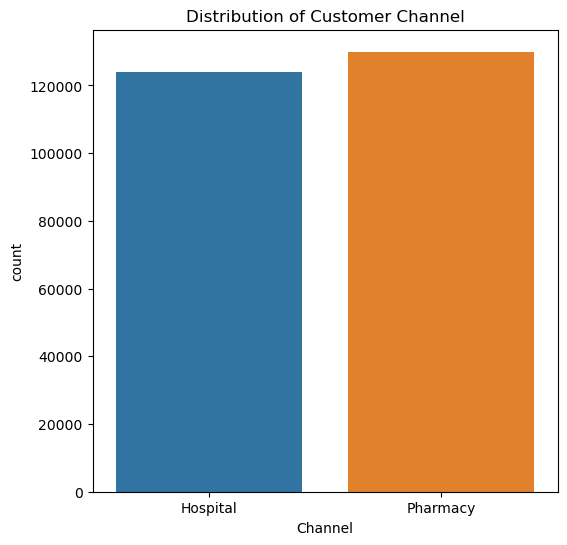

In [21]:
# Plot distribution of customer channel
plt.figure(figsize=(6, 6))
sns.countplot(x='Channel', data=sales_data)
plt.title('Distribution of Customer Channel')
plt.show()

# ANALYSIS OF PRODUCT PERFORMANCE AND TRENDS, INCLUDING PRODUCT LIFECYCLE AND SALES DISTRIBUTION

In [22]:
#Group by productclass and productname to get product performance

product_performance = sales_data.groupby(['ProductClass', 'ProductName'])['Sales'].sum().reset_index()

print(product_performance)

         ProductClass            ProductName         Sales
0          Analgesics               Acelimus  8.667699e+07
1          Analgesics               Afaxacin  8.866320e+06
2          Analgesics                Aldevac  3.823040e+06
3          Analgesics  Alemtuvatol Megalinum  6.643703e+07
4          Analgesics           Alglutriptan  3.019331e+07
..                ...                    ...           ...
235  Mood Stabilizers              Topitaine  6.549149e+07
236  Mood Stabilizers           Trazobalamin  8.299019e+07
237  Mood Stabilizers           Trazozaprine  8.683691e+07
238  Mood Stabilizers   Veratorol Ciclovatol  1.557140e+07
239  Mood Stabilizers              Xenaderal  3.386852e+07

[240 rows x 3 columns]


In [23]:
# Group data by 'ProductKey', 'ProductName' to get product performance
product_performance = sales_data.groupby(['ProductClass', 'ProductName'])['Sales'].sum().sort_values(ascending=False)

# Display top 10 products 
print("Top Performing Products:\n", product_performance.head(10))

Top Performing Products:
 ProductClass  ProductName          
Analgesics    Ionclotide               169083391.0
Antimalarial  Tetratanyl               126091294.0
Analgesics    Sumanazole               113861431.0
              Betanem                  107073473.0
Antiseptics   Docstryl Rivacin         103811886.0
              Travoloride              101167660.0
Antimalarial  Propratecan              100878712.0
Analgesics    Ketastadil                97313783.0
Antibiotics   Nevanide Actozide         96643552.0
              Cephozumab Synmethate     95320320.0
Name: Sales, dtype: float64


#### Analysis of Sales Distribution

In [24]:
region_sales = sales_data.groupby(['Country'])['Sales'].sum().reset_index()

print(region_sales)

   Country         Sales
0  Germany  1.111811e+10
1   Poland  6.808798e+08


In [25]:
top_regions = region_sales.sort_values(by='Sales', ascending=False).head(2)

In [26]:
print(top_regions)

   Country         Sales
0  Germany  1.111811e+10
1   Poland  6.808798e+08


In [27]:
df = pd.DataFrame(top_regions)

### Chart showing the high and low performing Countries respectively.

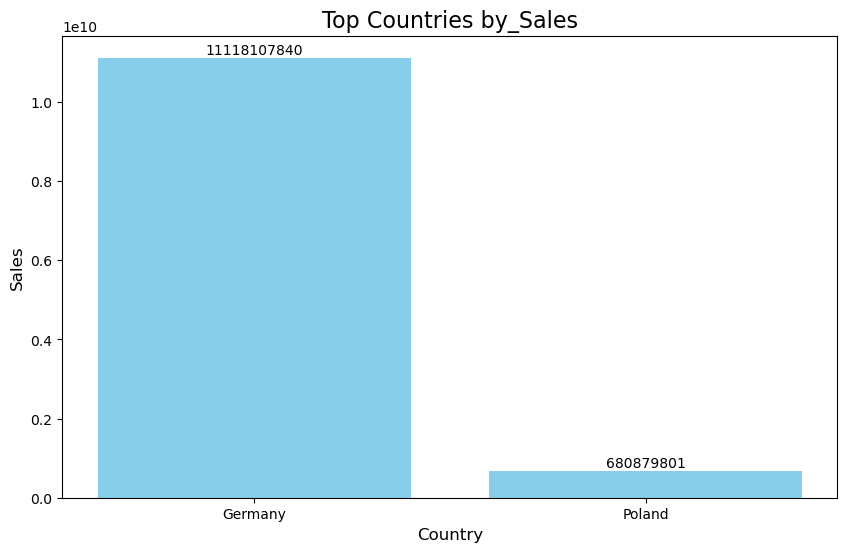

In [28]:
plt.figure(figsize=(10,6))
bars = plt.bar(df['Country'], df['Sales'], color ='skyblue')
# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (OrderQuantity)
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X position: center of the bar
        yval,  # Y position: height of the bar
        int(yval),  # The actual value to be displayed as text (integer value of OrderQuantity)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment (text placed just above the bar)
        fontsize=10  # Set the font size of the labels
    )

plt.bar(df['Country'], df['Sales'], color='skyblue')
plt.title('Top Countries by_Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()